In [23]:
import numpy as np
from Tensor.matrix import Tensor
from nn.linear import Node , Layer , Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from Optimizer.base import GD


In [7]:
# preparing dataset from using sklearn datasets 
# visualize it using matplotlib.pyplot 
x , y = make_blobs(n_samples=400, n_features=2,shuffle=True)
y = np.where(y > 1 , 1, -1)
print('output data is : ', y)
print('input x data is : ', x)

output data is :  [ 1  1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1 -1  1  1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1
 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1

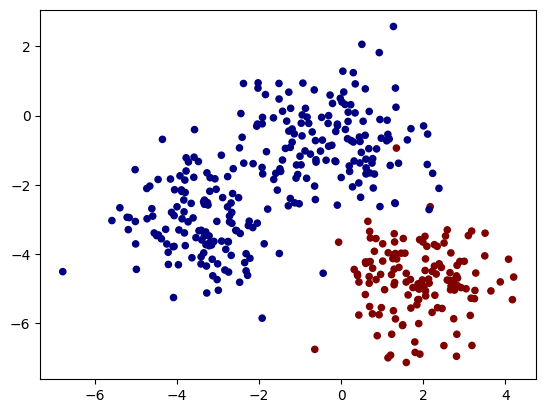

In [8]:
plt.scatter(x[:,0], x[:,1], c=y, s=20, cmap='jet') # this is how data is distributed along the x and y axis


In [11]:
print('shape of x is ',x.shape)
print('shape of y is ',y.shape)

shape of x is  (400, 2)
shape of y is  (400,)


In [24]:
# model building -- a simple dense layer 
model = Dense(n_input=2 ,list_layers=[10,20,30,1])
print('dense layer is ', model)
params = model.parameters()
print('model parameters are ', params)
print('length of model paramters is ', len(params))



dense layer is  Dense of [Layer of [LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2, LinearNode2], Layer of [LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10, LinearNode10], Layer of [LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20], Layer of [LinearNode30]]
model parameters are  [Tensor(data:0.41357750632143797,grad:0.0), Tensor(data:-0.14258

In [16]:
"""
    splitting x and y into training and testing data using sklearn train_test_split function
"""
x_train , x_test , y_train , y_test = train_test_split(x,y,shuffle=True, test_size=0.2)
print('x_train shape is ',x_train.shape)
print('y_train shape is ', y_train.shape)
print('x_test shape is ', x_test.shape)
print('y_test shape is ' , y_test.shape)


x_train shape is  (320, 2)
y_train shape is  (320,)
x_test shape is  (80, 2)
y_test shape is  (80,)


In [26]:
"""
    defining training loop 
"""
def train():

    x_train_feeded_data = [list(map(Tensor, xrow)) for xrow in x_train]
    y_predicted = model(x=x_train_feeded_data)
    print(y_predicted)
    print(len(y_predicted))

train()

[[Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228,grad:0.0)], [Tensor(data:0.7023577388907228

In [120]:
for k in range(100):
    
    # forward
    total_loss = loss()
    
    # backward
    # model_nn.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in parameter:
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


    

shape of scores  (400, 1)
shape of y is  (400, 1)
rendered
Tensor(data:222.35965994681683,grad:1.0)


AttributeError: 'NoneType' object has no attribute 'backward'